In [8]:
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.17.0


In [2]:
df = pd.read_csv('TMNIST_Data.csv')

In [3]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X = df.drop(columns=['labels','names'])
y = df['labels']
classes = [0,1,2,3,4,5,6,7,8,9]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [44]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [48]:
X_train = X_train.reshape(23920,28,28)
X_test = X_test.reshape(5980,28,28)

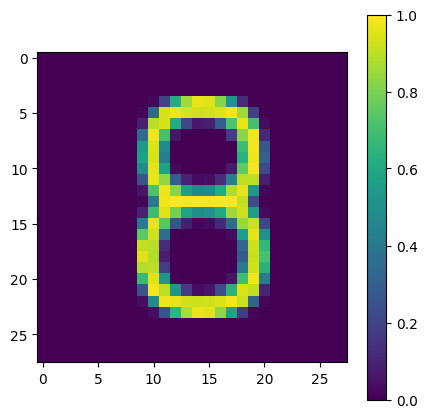

In [66]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

C:\Users\khodg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [54]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.8894 - loss: 0.4590
Epoch 2/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.9695 - loss: 0.1170
Epoch 3/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - accuracy: 0.9799 - loss: 0.0788
Epoch 4/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.9828 - loss: 0.0679
Epoch 5/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9855 - loss: 0.0546
Epoch 6/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.9867 - loss: 0.0484
Epoch 7/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.9901 - loss: 0.0385
Epoch 8/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.9897 - loss: 0.0364
Epoch 9/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.9932 - loss: 0.0264
Epoch 10/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.9942 - loss: 0.0244


In [55]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()]) 

In [75]:
predictions = probability_model.predict(X_test)
y_test.head()

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


15756    3
19617    5
18973    8
16397    9
16366    0
Name: labels, dtype: int64

In [76]:
predictions[0]

array([1.3289315e-07, 2.5440497e-10, 8.5522659e-13, 2.1540909e-06,
       4.0834933e-11, 9.9994349e-01, 5.3941920e-05, 2.3125750e-13,
       2.1324057e-07, 7.1888465e-08], dtype=float32)

In [78]:
classes[np.argmax(predictions[0])]

3